# Project work: A mini segmentation challenge

Imaging for the Life Sciences  
MSLS / CO4: Project work

**Student**: $\Rightarrow$  Guansheng Du    
**University**: $\Rightarrow$  ZHAW  
**Semester**: $\Rightarrow$  SS24   
**Date**: $\Rightarrow$  26.05.2024 



## Dataset 

[https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation](https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation)

<br><br><br>
## Table of contents
<!-- Unfortunately, the following does not always work correctly -->
* [1. Dataset](#sec_dataset)  
* [2. Preprocessing](#sec_preprocessing)  
* [3. Manual segmentation](#sec_manual_segmentation)  
* [4. Automated segmentation](#sec_automated_segmentation)  
* [5. Evaluation](#sec_evaluation)  
* [6. Discussion](#sec_discussion)  
* [*. Hints](#sec_hints)  


---

## Prerequisites / Setup

$\Rightarrow$  Special setup instructions, imports and configurations go here.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import nibabel as nib
import pydicom
import PIL

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload
%autoreload 2

# Enable vectorized output (for nicer plots)
%config InlineBackend.figure_formats = ["svg"]

# Inline backend configuration
%matplotlib inline

# Enable this line if you want to use the interactive widgets
# It requires the ipympl package to be installed.
#%matplotlib widget

import sys
sys.path.insert(0, "../")
import tools

data_folder = '/home/gs/Desktop/SS24 CO4 Imaging for the Life Sciences/MRI_segmentation_data/raw/'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---


<a id='sec_dataset'></a>

## Dataset

$\Rightarrow$ Describe your dataset.

### Requirements:
* Dataset of at least 10 image samples
* The data set must not be larger than 200 MB. If your data is larger, please contact the tutor.
* Make sure you have the right to use the data and share it with others (check the usage license!)
* A structure of interest should be easily recognizable in these samples
* Avoid data with too much variation
* All students will use different datasets!


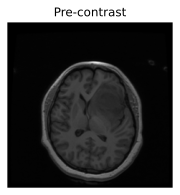

In [94]:
# Read in sample .tif image with pre-contrast and post-contrast channels 

image = PIL.Image.open(
    data_folder + "TCGA_HT_A61A_20000127_43.tif"
)

# Split the image into individual bands
channels = image.split()

# Access each channel individually
pre_contrast = channels[0]
FLAIR = channels[1]
post_contrast = channels[2]

# Display the pre-contrast channel
plt.figure(figsize=(3, 3))
plt.imshow(pre_contrast, cmap="gray")
plt.title("Pre-contrast")
plt.axis("off")
plt.show()



(-0.5, 255.5, 255.5, -0.5)

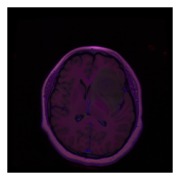

In [95]:
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.axis("off")

In [96]:
%%capture

# Read in sample .tif image with pre-contrast and post-contrast channels

image = PIL.Image.open(
    data_folder + "TCGA_HT_A61B_19991127_34.tif"
)


# Split the image into individual bands
channels = image.split()

# Access each channel individually
pre_contrast = channels[0]
FLAIR = channels[1]
post_contrast = channels[2]

# Display the pre-contrast channel
plt.figure(figsize=(5, 5))
plt.imshow(pre_contrast, cmap="gray")
plt.title("Pre-contrast")
plt.show()

# Display the FLAIR channel
plt.figure(figsize=(5, 5))
plt.imshow(FLAIR, cmap="gray")
plt.title("FLAIR")
plt.show()

# Display the post-contrast channel
plt.figure(figsize=(5, 5))
plt.imshow(post_contrast, cmap="gray")
plt.title("Post-contrast")
plt.show()

---

<a id='sec_preprocessing'></a>

## Preprocessing

$\Rightarrow$ Describe the pre-processing that was required to complete the segmentation task.


### Goals:
* Choose a method that scales well for larger datasets
* Improve the datasets for easier processing

In [97]:
# Function to sort filenames in natural order
# Generated by AI

import re

def natural_sort(l):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split("([0-9]+)", key)]
    return sorted(l, key=alphanum_key)



In [98]:
import os
import pandas as pd

# Get a list of all .tif files in the data folder
tif_files = [f for f in os.listdir(data_folder) if f.endswith(".tif")]

# Usage:
tif_files = natural_sort(tif_files)
tif_files

['TCGA_CS_4941_19960909_1.tif',
 'TCGA_CS_4941_19960909_1_mask.tif',
 'TCGA_CS_4941_19960909_2.tif',
 'TCGA_CS_4941_19960909_2_mask.tif',
 'TCGA_CS_4941_19960909_3.tif',
 'TCGA_CS_4941_19960909_3_mask.tif',
 'TCGA_CS_4941_19960909_4.tif',
 'TCGA_CS_4941_19960909_4_mask.tif',
 'TCGA_CS_4941_19960909_5.tif',
 'TCGA_CS_4941_19960909_5_mask.tif',
 'TCGA_CS_4941_19960909_6.tif',
 'TCGA_CS_4941_19960909_6_mask.tif',
 'TCGA_CS_4941_19960909_7.tif',
 'TCGA_CS_4941_19960909_7_mask.tif',
 'TCGA_CS_4941_19960909_8.tif',
 'TCGA_CS_4941_19960909_8_mask.tif',
 'TCGA_CS_4941_19960909_9.tif',
 'TCGA_CS_4941_19960909_9_mask.tif',
 'TCGA_CS_4941_19960909_10.tif',
 'TCGA_CS_4941_19960909_10_mask.tif',
 'TCGA_CS_4941_19960909_11.tif',
 'TCGA_CS_4941_19960909_11_mask.tif',
 'TCGA_CS_4941_19960909_12.tif',
 'TCGA_CS_4941_19960909_12_mask.tif',
 'TCGA_CS_4941_19960909_13.tif',
 'TCGA_CS_4941_19960909_13_mask.tif',
 'TCGA_CS_4941_19960909_14.tif',
 'TCGA_CS_4941_19960909_14_mask.tif',
 'TCGA_CS_4941_19960909_

In [99]:
mask_files = [f for f in tif_files if "_mask" in f]
len(mask_files)

3929

In [100]:
image_files = [f for f in tif_files if "_mask" not in f]
len(image_files)


3929

In [101]:
# Create a DataFrame
df = pd.DataFrame({"image_file": image_files, "mask_file": mask_files})
df.head()

image_file                         mask_file
0  TCGA_CS_4941_19960909_1.tif  TCGA_CS_4941_19960909_1_mask.tif
1  TCGA_CS_4941_19960909_2.tif  TCGA_CS_4941_19960909_2_mask.tif
2  TCGA_CS_4941_19960909_3.tif  TCGA_CS_4941_19960909_3_mask.tif
3  TCGA_CS_4941_19960909_4.tif  TCGA_CS_4941_19960909_4_mask.tif
4  TCGA_CS_4941_19960909_5.tif  TCGA_CS_4941_19960909_5_mask.tif

In [102]:
from PIL import Image
import numpy as np

df['mask_path'] = df.mask_file.apply(lambda x: data_folder + x)
df['image_path'] = df.image_file.apply(lambda x: data_folder + x)

df.head()

image_file                         mask_file  \
0  TCGA_CS_4941_19960909_1.tif  TCGA_CS_4941_19960909_1_mask.tif   
1  TCGA_CS_4941_19960909_2.tif  TCGA_CS_4941_19960909_2_mask.tif   
2  TCGA_CS_4941_19960909_3.tif  TCGA_CS_4941_19960909_3_mask.tif   
3  TCGA_CS_4941_19960909_4.tif  TCGA_CS_4941_19960909_4_mask.tif   
4  TCGA_CS_4941_19960909_5.tif  TCGA_CS_4941_19960909_5_mask.tif   

                                           mask_path  \
0  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
1  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
2  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
3  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
4  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   

                                          image_path  
0  /home/gs/Desktop/SS24 CO4 Imaging for the Life...  
1  /home/gs/Desktop/SS24 CO4 Imaging for the Life...  
2  /home/gs/Desktop/SS24 CO4 Imaging for the Life...  
3  /home/gs/Desktop/SS24 CO4 Imaging for the Life...  
4  /home/gs/Desktop/SS24 CO4 Imaging for the Life...

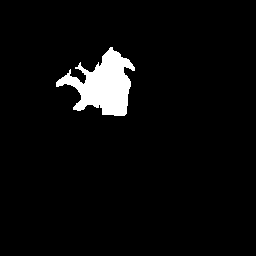

In [103]:
Image.open(df["mask_path"][12])

In [104]:
from PIL import Image
import numpy as np


def check_mask(file):
    # Open the file
    image = Image.open(file)

    # Convert the image to an array
    image_array = np.array(image)

    # Check if there is a white pixel
    if np.any(image_array > 0):
        return 1
    else:
        return 0



In [105]:
df["check_mask"] = df["mask_path"].apply(check_mask)

df.head()

image_file                         mask_file  \
0  TCGA_CS_4941_19960909_1.tif  TCGA_CS_4941_19960909_1_mask.tif   
1  TCGA_CS_4941_19960909_2.tif  TCGA_CS_4941_19960909_2_mask.tif   
2  TCGA_CS_4941_19960909_3.tif  TCGA_CS_4941_19960909_3_mask.tif   
3  TCGA_CS_4941_19960909_4.tif  TCGA_CS_4941_19960909_4_mask.tif   
4  TCGA_CS_4941_19960909_5.tif  TCGA_CS_4941_19960909_5_mask.tif   

                                           mask_path  \
0  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
1  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
2  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
3  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
4  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   

                                          image_path  check_mask  
0  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0  
1  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0  
2  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0  
3  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0  
4  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0

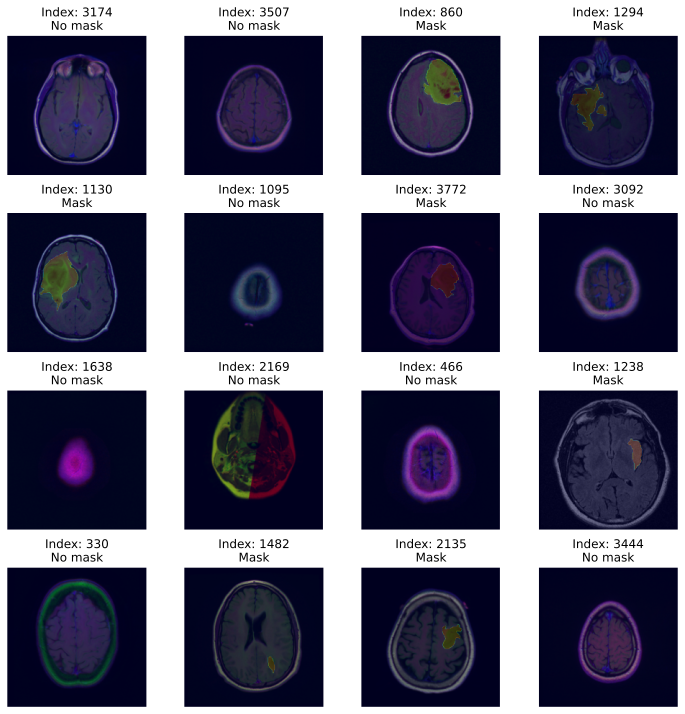

In [178]:


import numpy as np
import matplotlib.pyplot as plt

import torch

np.random.seed(42)

# Generate 16 random indices
indices = np.random.randint(0, len(df), 16)

# Create a figure for the subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Loop over the indices
for i, index in enumerate(indices):
    # Read the image and mask
    image = Image.open(df.loc[index, "image_path"])
    mask = Image.open(df.loc[index, "mask_path"])

    # Create a subplot for the image and mask
    ax = axs[i // 4, i % 4]
    ax.imshow(image, cmap="gray")
    ax.imshow(mask, cmap="jet", alpha=0.5)  # Overlay the mask on the image
    ax.axis("off")
    
    mask_status = "Mask" if df.loc[index, "check_mask"] == 1 else "No mask"
    ax.set_title(f"Index: {index}\n{mask_status}")


plt.tight_layout()
plt.show()

In [107]:
np.random.randint(0, len(df), 16)


array([3171, 2919, 3735,  130, 1685, 3380,  769, 2391, 1515, 3485, 2853,
       2433, 1215,  955, 2324, 1184])

In [108]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms.v2 as transforms

data_transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomApply([transforms.RandomRotation(degrees=90)], p=0.5),
        transforms.ToImage(),
        transforms.ToDtype(torch.float32, scale=True),
    ]
)

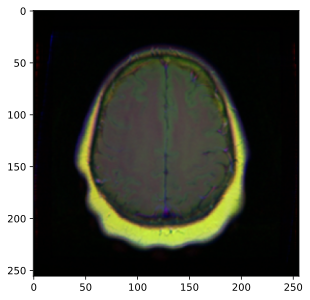

In [109]:
image = Image.open(df["image_path"][37])
plt.imshow(image)


(-0.5, 127.5, 127.5, -0.5)

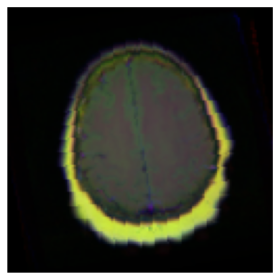

In [110]:

image2 = data_transform(image)
plt.imshow(image2.permute(1, 2, 0))
plt.axis("off")

In [111]:
def show_aug(inputs, nrows=1, ncols=1, norm=False):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    i_ = 0

    if len(inputs) > 25:
        inputs = inputs[:25]

    for idx in range(len(inputs)):

        # normalization
        if norm:
            img = inputs[idx].numpy().transpose(1, 2, 0)
            mean = [0.485, 0.456, 0.406]
            std = [0.229, 0.224, 0.225]
            img = (img * std + mean).astype(np.float32)

        else:
            img = inputs[idx].numpy().astype(np.float32)
            img = img[0, :, :]

        plt.subplot(nrows, ncols, i_ + 1)
        plt.imshow(img)
        plt.axis("off")

        i_ += 1

    return plt.show()

In [175]:
show_aug(image2, nrows=1, ncols=1, norm=False)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 1000x1000 with 0 Axes>

In [176]:
%%capture

np.random.seed(42)

# Generate 16 random indices
indices = np.random.randint(0, len(df), 16)

# Create a figure for the subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Loop over the indices
for i, index in enumerate(indices):
    # Read the image and mask
    image = Image.open(df.loc[index, "image_path"])
    # mask = Image.open(df.loc[index, "mask_file"])
    image = data_transform(image=np.array(image))["image"]

    # Create a subplot for the image and mask
    ax = axs[i // 4, i % 4]

    ax.imshow(image)
    # ax.imshow(mask, cmap="jet", alpha=0.5)  # Overlay the mask on the image
    ax.axis("off")

    mask_status = "Mask" if df.loc[index, "check_mask"] == 1 else "No mask"
    ax.set_title(f"Index: {index}\n{mask_status}")

plt.tight_layout()
plt.show()

TypeError: Compose.forward() got an unexpected keyword argument 'image'

---

<a id='sec_manual_segmentation'></a>

## Manual segmentation

$\Rightarrow$ Describe the manual segmentation step


### Goals:
* Segment structures of interest using a tool  
* These structures you need to 
* If you find a dataset that comes with segmentation masks, you still need to demonstrate how to create such masks!

---

<a id='sec_automated_segmentation'></a>

## Automated segmentation

$\Rightarrow$ Describe how to segment the image in Python


### Goals:
* The segmentation must be performed in Python.
* Using an external library or tool (e.g. OpenCV) is permitted.
* Implement a function `segment(image, ...)` takes an image as input and creates a segmentation mask for the structure of interest.

In [113]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [114]:
df.head()

image_file                         mask_file  \
0  TCGA_CS_4941_19960909_1.tif  TCGA_CS_4941_19960909_1_mask.tif   
1  TCGA_CS_4941_19960909_2.tif  TCGA_CS_4941_19960909_2_mask.tif   
2  TCGA_CS_4941_19960909_3.tif  TCGA_CS_4941_19960909_3_mask.tif   
3  TCGA_CS_4941_19960909_4.tif  TCGA_CS_4941_19960909_4_mask.tif   
4  TCGA_CS_4941_19960909_5.tif  TCGA_CS_4941_19960909_5_mask.tif   

                                           mask_path  \
0  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
1  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
2  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
3  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
4  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   

                                          image_path  check_mask  
0  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0  
1  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0  
2  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0  
3  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0  
4  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           0

In [115]:
# train_df = df.sample(frac=0.8, random_state=42)
# test_df = df.drop(train_df.index)


df_mask = df[df["check_mask"] == 1]
train_df = df_mask.sample(frac=0.8, random_state=42)
test_df = df_mask.drop(train_df.index)


train_df.shape, test_df.shape

((1098, 5), (275, 5))

In [116]:
df_mask.head()

image_file                          mask_file  \
10  TCGA_CS_4941_19960909_11.tif  TCGA_CS_4941_19960909_11_mask.tif   
11  TCGA_CS_4941_19960909_12.tif  TCGA_CS_4941_19960909_12_mask.tif   
12  TCGA_CS_4941_19960909_13.tif  TCGA_CS_4941_19960909_13_mask.tif   
13  TCGA_CS_4941_19960909_14.tif  TCGA_CS_4941_19960909_14_mask.tif   
14  TCGA_CS_4941_19960909_15.tif  TCGA_CS_4941_19960909_15_mask.tif   

                                            mask_path  \
10  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
11  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
12  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
13  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   
14  /home/gs/Desktop/SS24 CO4 Imaging for the Life...   

                                           image_path  check_mask  
10  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           1  
11  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           1  
12  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           1  
13  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           1  
14  /home/gs/Desktop/SS24 CO4 Imaging for the Life...           1

In [117]:
from PIL import Image

import torch
from torch.utils.data import Dataset
import random

class CustomImageDataset(Dataset):
    def __init__(self, df, transforms=None):
        self.df = df
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def load_image(self, idx):
        image = Image.open(self.df.iloc[idx, "image_path"])
        mask = Image.open(self.df.iloc[idx, "mask_path"])
        return image, mask

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.df["image_path"].iloc[idx]
        mask_name = self.df["mask_path"].iloc[idx]

        image = Image.open(img_name)
        mask = Image.open(mask_name)
        
        image, mask = self.transforms(image, mask)


        return image, mask

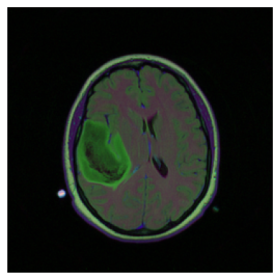

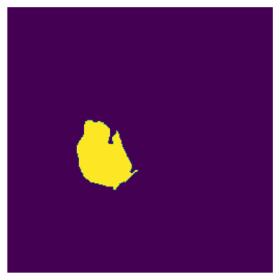

In [118]:
image = plt.imread(train_df.iloc[16]["image_path"])
mask = plt.imread(train_df.iloc[16]["mask_path"]) 


plt.imshow(image)
plt.axis("off")
plt.show()

plt.imshow(mask)
plt.axis("off")
plt.show()



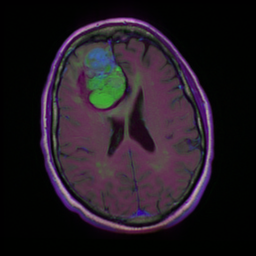

In [119]:
Image.open(train_df.iloc[10]["image_path"])


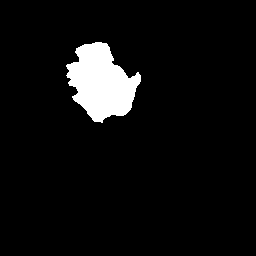

In [120]:

Image.open(train_df.iloc[10]["mask_path"])


In [121]:

train_dataset = CustomImageDataset(train_df, transforms=data_transform)
test_dataset = CustomImageDataset(test_df, transforms=data_transform)


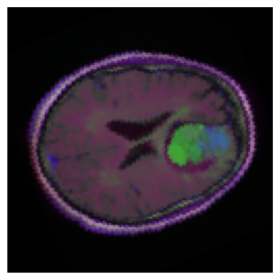

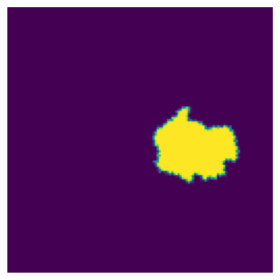

In [122]:
image, mask = train_dataset[10]

plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.show()

plt.imshow(mask.permute(1, 2, 0))
plt.axis("off")
plt.show()

In [123]:
train_loader = DataLoader(
    train_dataset, batch_size=16, shuffle=True
)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f66aadca790>,
 <torch.utils.data.dataloader.DataLoader at 0x7f66aa025ed0>)

In [124]:
image, mask = next(iter(train_loader))
image.shape, mask.shape

(torch.Size([16, 3, 128, 128]), torch.Size([16, 1, 128, 128]))

In [125]:
os.cpu_count()

6

In [126]:
train_df["image_path"].iloc[0]

'/home/gs/Desktop/SS24 CO4 Imaging for the Life Sciences/MRI_segmentation_data/raw/TCGA_DU_7014_19860618_27.tif'

In [127]:
train_df.iloc[0, train_df.columns.get_loc("image_path")]


'/home/gs/Desktop/SS24 CO4 Imaging for the Life Sciences/MRI_segmentation_data/raw/TCGA_DU_7014_19860618_27.tif'

In [128]:
train_dataset[0][0]

Image([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

       [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
        [0.0000, 0.0078, 0.0078,  ..., 0.0078, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0078,  ..., 0.0039, 0.0039, 0.0000],
        [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

       [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ..

/home/gs/Desktop/SS24 CO4 Imaging for the Life Sciences/MRI_segmentation_data/raw/TCGA_DU_7014_19860618_27.tif


(-0.5, 127.5, 127.5, -0.5)

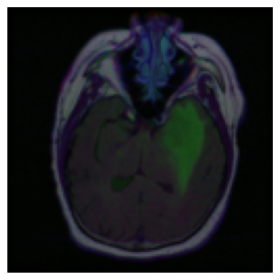

In [129]:
print(train_df.iloc[0]['image_path'])
plt.imshow(train_dataset[0][0].permute(1, 2, 0))
plt.axis("off")


## U-Net 0

In [130]:
import torch.nn as nn

class UNet(nn.Module):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        ).to(device)

        self.middle = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        ).to(device)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 1, kernel_size=1),
        ).to(device)

    def forward(self, x):
        x = x.to(device)
        x1 = self.encoder(x)
        x2 = self.middle(x1)
        y = self.decoder(x2)
        return y


model = UNet().to(device)

model(image).shape

torch.Size([16, 1, 64, 64])

## UNet -2

In [131]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DoubleConv(nn.Module):
    """(Convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)


class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Contracting Path
        self.down1 = DoubleConv(3, 64)
        self.down2 = DoubleConv(64, 128)
        self.down3 = DoubleConv(128, 256)
        self.down4 = DoubleConv(256, 512)

        # Bottleneck
        self.bottleneck = DoubleConv(512, 1024)

        # Expansive Path
        self.up1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.conv1 = DoubleConv(1024, 512)
        self.up2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv2 = DoubleConv(512, 256)
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv3 = DoubleConv(256, 128)
        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv4 = DoubleConv(128, 64)

        # Final Convolution
        self.final = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        # Contracting Path
        x1 = self.down1(x)
        x2 = F.max_pool2d(x1, 2)
        x3 = self.down2(x2)
        x4 = F.max_pool2d(x3, 2)
        x5 = self.down3(x4)
        x6 = F.max_pool2d(x5, 2)
        x7 = self.down4(x6)
        x8 = F.max_pool2d(x7, 2)

        # Bottleneck
        x9 = self.bottleneck(x8)

        # Expansive Path
        x = self.up1(x9)
        x = torch.cat([x, x7], dim=1)
        x = self.conv1(x)
        x = self.up2(x)
        x = torch.cat([x, x5], dim=1)
        x = self.conv2(x)
        x = self.up3(x)
        x = torch.cat([x, x3], dim=1)
        x = self.conv3(x)
        x = self.up4(x)
        x = torch.cat([x, x1], dim=1)
        x = self.conv4(x)

        # Output layer
        logits = self.final(x)
        return logits


# Create the U-Net model
model = UNet().to(device)
print(model)

UNet(
  (down1): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down2): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down3): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2

## Attention U-Net

### Model Blocks

In [132]:
class ConvBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(ch_in, ch_out, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(ch_out),
            nn.ReLU(inplace=True),
            nn.Conv2d(ch_out, ch_out, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(ch_out),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.conv(x)
        return x

In [133]:
class UpConvBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super().__init__()
        self.up = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.Conv2d(ch_in, ch_out, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(ch_out),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = x = self.up(x)
        return x

In [134]:
class AttentionBlock(nn.Module):
    def __init__(self, f_g, f_l, f_int):
        super().__init__()

        self.w_g = nn.Sequential(
            nn.Conv2d(f_g, f_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(f_int),
        )

        self.w_x = nn.Sequential(
            nn.Conv2d(f_l, f_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(f_int),
        )

        self.psi = nn.Sequential(
            nn.Conv2d(f_int, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid(),
        )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, g, x):
        g1 = self.w_g(g)
        x1 = self.w_x(x)
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)

        return psi * x

### Model

In [135]:
class AttentionUNet(nn.Module):
    def __init__(self, n_classes=1, in_channel=3, out_channel=1):
        super().__init__()

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv1 = ConvBlock(ch_in=in_channel, ch_out=64)
        self.conv2 = ConvBlock(ch_in=64, ch_out=128)
        self.conv3 = ConvBlock(ch_in=128, ch_out=256)
        self.conv4 = ConvBlock(ch_in=256, ch_out=512)
        self.conv5 = ConvBlock(ch_in=512, ch_out=1024)

        self.up5 = UpConvBlock(ch_in=1024, ch_out=512)
        self.att5 = AttentionBlock(f_g=512, f_l=512, f_int=256)
        self.upconv5 = ConvBlock(ch_in=1024, ch_out=512)

        self.up4 = UpConvBlock(ch_in=512, ch_out=256)
        self.att4 = AttentionBlock(f_g=256, f_l=256, f_int=128)
        self.upconv4 = ConvBlock(ch_in=512, ch_out=256)

        self.up3 = UpConvBlock(ch_in=256, ch_out=128)
        self.att3 = AttentionBlock(f_g=128, f_l=128, f_int=64)
        self.upconv3 = ConvBlock(ch_in=256, ch_out=128)

        self.up2 = UpConvBlock(ch_in=128, ch_out=64)
        self.att2 = AttentionBlock(f_g=64, f_l=64, f_int=32)
        self.upconv2 = ConvBlock(ch_in=128, ch_out=64)

        self.conv_1x1 = nn.Conv2d(64, out_channel, kernel_size=1, stride=1, padding=0)

    def forward(self, x):
        # encoder
        x1 = self.conv1(x)

        x2 = self.maxpool(x1)
        x2 = self.conv2(x2)

        x3 = self.maxpool(x2)
        x3 = self.conv3(x3)

        x4 = self.maxpool(x3)
        x4 = self.conv4(x4)

        x5 = self.maxpool(x4)
        x5 = self.conv5(x5)

        # decoder + concat
        d5 = self.up5(x5)
        x4 = self.att5(g=d5, x=x4)
        d5 = torch.concat((x4, d5), dim=1)
        d5 = self.upconv5(d5)

        d4 = self.up4(d5)
        x3 = self.att4(g=d4, x=x3)
        d4 = torch.concat((x3, d4), dim=1)
        d4 = self.upconv4(d4)

        d3 = self.up3(d4)
        x2 = self.att3(g=d3, x=x2)
        d3 = torch.concat((x2, d3), dim=1)
        d3 = self.upconv3(d3)

        d2 = self.up2(d3)
        x1 = self.att2(g=d2, x=x1)
        d2 = torch.concat((x1, d2), dim=1)
        d2 = self.upconv2(d2)

        d1 = self.conv_1x1(d2)

        return d1

In [136]:
attention_unet = AttentionUNet(n_classes=1).to(device)

## U-Net

In [137]:
import torch.nn.functional as F

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2), DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(
                in_channels, in_channels // 2, kernel_size=2, stride=2
            )
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1), nn.Sigmoid()
        )

    def forward(self, x):
        return self.conv(x)

In [138]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

In [139]:
model = UNet(3, 1).to(device)
out = model(torch.randn(1, 3, 128, 128).to(device))
print(out.shape)

torch.Size([1, 1, 128, 128])


## U-Net 3

In [140]:
import torch
import torch.nn as nn


class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2), DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        # if you have enough GPU memory to handle more parameters, replace the following line
        # with nn.ConvTranspose2d to achieve better results
        self.up = nn.ConvTranspose2d(
            in_channels // 2, in_channels // 2, kernel_size=2, stride=2
        )
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = nn.functional.pad(
            x1, [diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2]
        )
        # if you have enough GPU memory to handle more parameters, you can also add bilinear=True
        # to the upsample to achieve better results.
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, 1)

    def forward(self, x):
        return self.conv(x)


class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.n_channels = 3
        self.n_classes = 1
        self.inc = DoubleConv(3, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 512)
        self.up1 = Up(1024, 256)
        self.up2 = Up(512, 128)
        self.up3 = Up(256, 64)
        self.up4 = Up(128, 64)
        self.outc = OutConv(64, 1)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits


# Create the UNet model
model = UNet().to(device)

## Training

In [141]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()  # Suitable for binary segmentation
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [142]:
import torch


class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, predictions, targets):
        predictions = predictions.sigmoid()  # Apply sigmoid to clamp between 0 and 1
        intersection = (
            predictions * targets
        ).sum()  # Element-wise multiplication and sum
        dice = (2.0 * intersection + self.smooth) / (
            predictions.sum() + targets.sum() + self.smooth
        )
        return 1 - dice
    
dice_loss = DiceLoss()

In [143]:
%%capture
plt.imshow(image[0].permute(1, 2, 0))

In [144]:
mask_t = model(image.to(device))
mask_t.shape

torch.Size([16, 1, 128, 128])

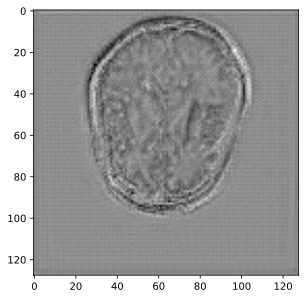

In [145]:
plt.imshow(mask_t[0].detach().cpu().numpy().squeeze(), cmap="gray")

Epoch 1/30, Training Loss: 0.8149
Epoch 1/30, Validation Loss: 0.0421


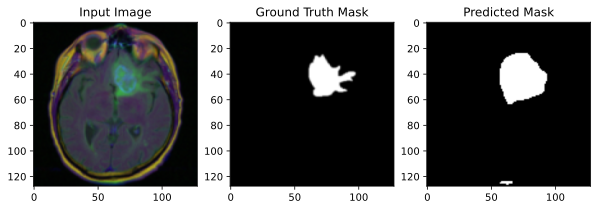

Epoch 2/30, Training Loss: 0.5645
Epoch 2/30, Validation Loss: 0.0291


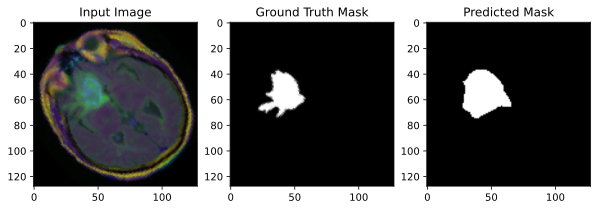

Epoch 3/30, Training Loss: 0.3543
Epoch 3/30, Validation Loss: 0.0394


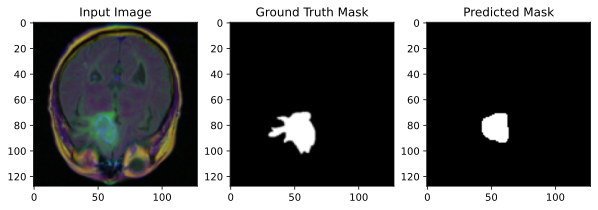

Epoch 4/30, Training Loss: 0.2786
Epoch 4/30, Validation Loss: 0.0169


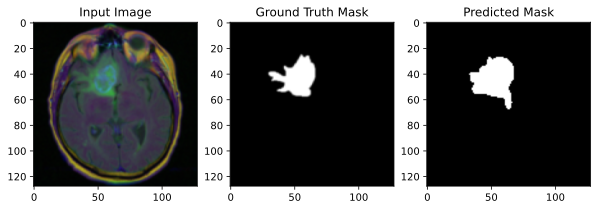

Epoch 5/30, Training Loss: 0.2670
Epoch 5/30, Validation Loss: 0.0185


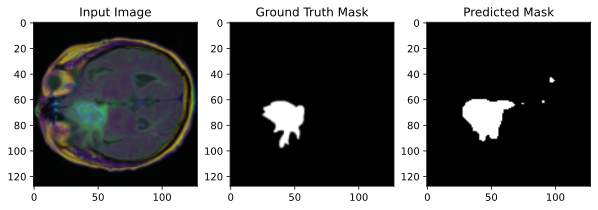

Epoch 6/30, Training Loss: 0.2441
Epoch 6/30, Validation Loss: 0.0177


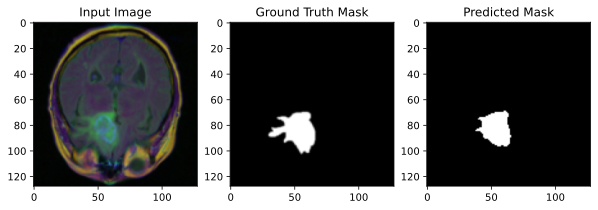

Epoch 7/30, Training Loss: 0.2240
Epoch 7/30, Validation Loss: 0.0148


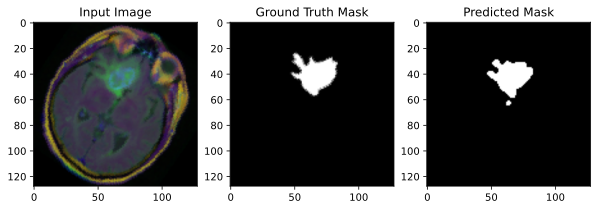

Epoch 8/30, Training Loss: 0.2235
Epoch 8/30, Validation Loss: 0.0176


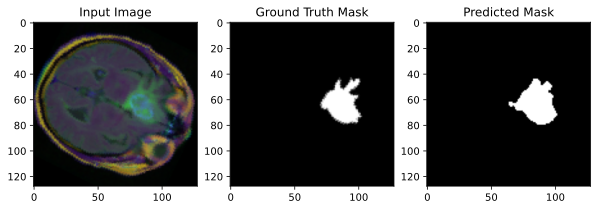

Epoch 9/30, Training Loss: 0.2261
Epoch 9/30, Validation Loss: 0.0144


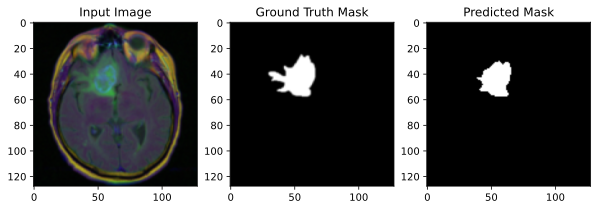

Epoch 10/30, Training Loss: 0.2146
Epoch 10/30, Validation Loss: 0.0156


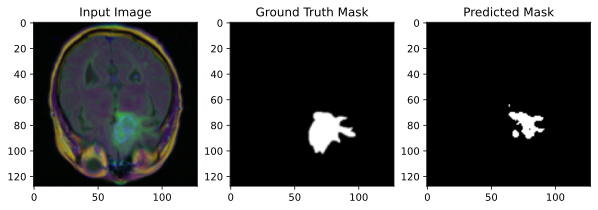

Epoch 11/30, Training Loss: 0.2218
Epoch 11/30, Validation Loss: 0.0111


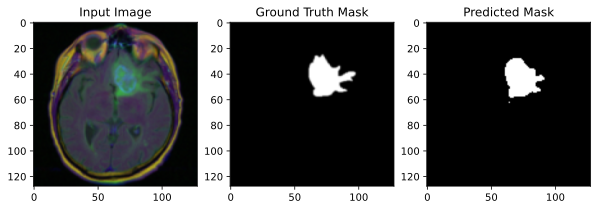

Epoch 12/30, Training Loss: 0.2028
Epoch 12/30, Validation Loss: 0.0122


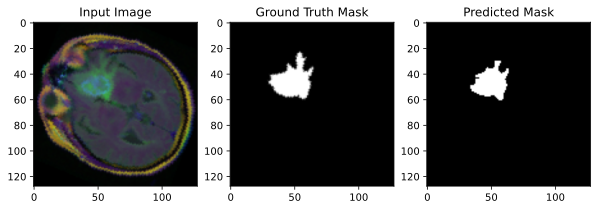

Epoch 13/30, Training Loss: 0.1998
Epoch 13/30, Validation Loss: 0.0127


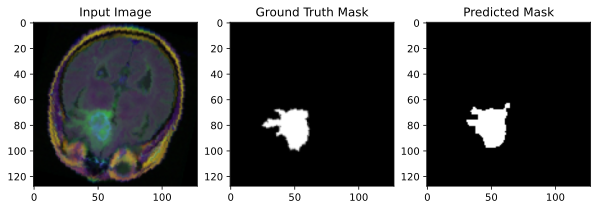

Epoch 14/30, Training Loss: 0.1962
Epoch 14/30, Validation Loss: 0.0108


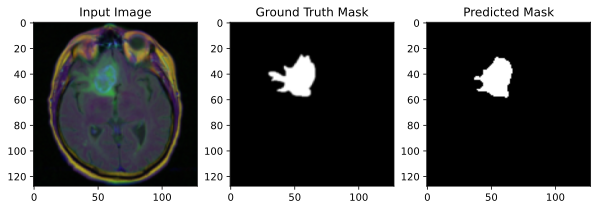

Epoch 15/30, Training Loss: 0.1794
Epoch 15/30, Validation Loss: 0.0110


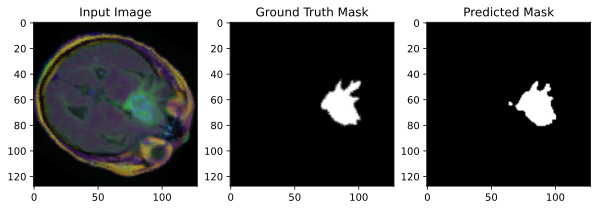

Epoch 16/30, Training Loss: 0.1863
Epoch 16/30, Validation Loss: 0.0109


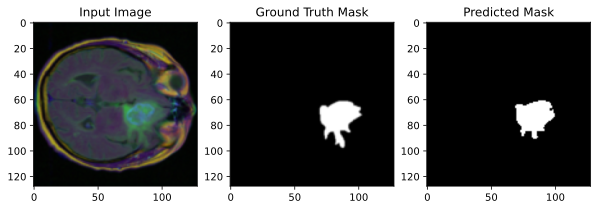

Epoch 17/30, Training Loss: 0.1970
Epoch 17/30, Validation Loss: 0.0137


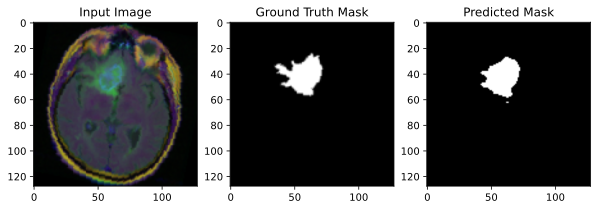

Epoch 18/30, Training Loss: 0.1881
Epoch 18/30, Validation Loss: 0.0137


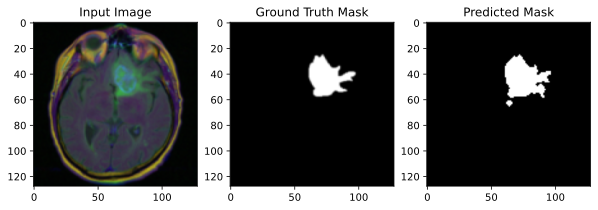

Epoch 19/30, Training Loss: 0.1828
Epoch 19/30, Validation Loss: 0.0110


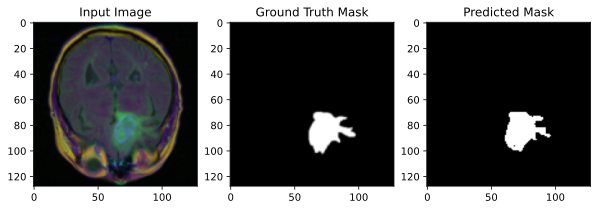

Epoch 20/30, Training Loss: 0.1871
Epoch 20/30, Validation Loss: 0.0116


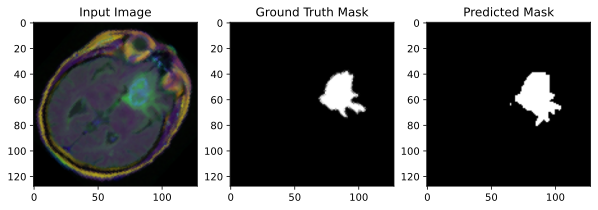

Epoch 21/30, Training Loss: 0.1800
Epoch 21/30, Validation Loss: 0.0114


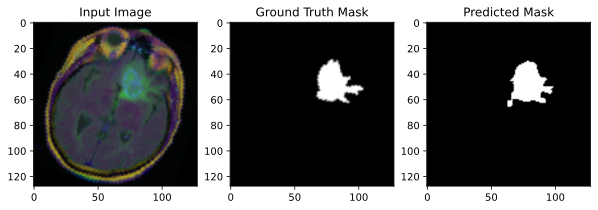

Epoch 22/30, Training Loss: 0.1757
Epoch 22/30, Validation Loss: 0.0115


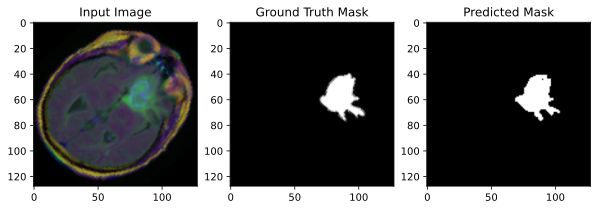

Epoch 23/30, Training Loss: 0.1721
Epoch 23/30, Validation Loss: 0.0126


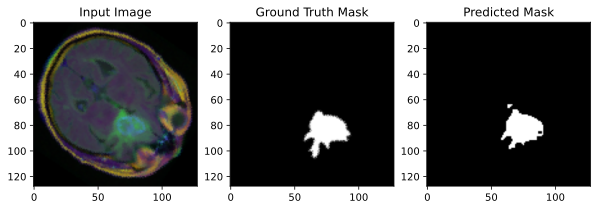

Epoch 24/30, Training Loss: 0.1671
Epoch 24/30, Validation Loss: 0.0103


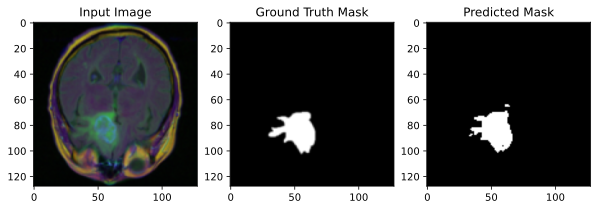

Epoch 25/30, Training Loss: 0.1698
Epoch 25/30, Validation Loss: 0.0156


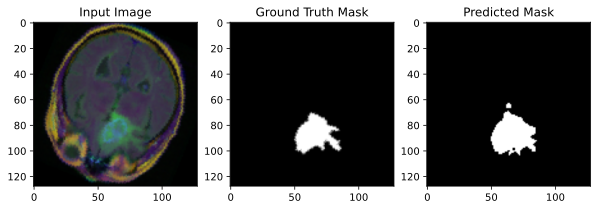

Epoch 26/30, Training Loss: 0.1712
Epoch 26/30, Validation Loss: 0.0115


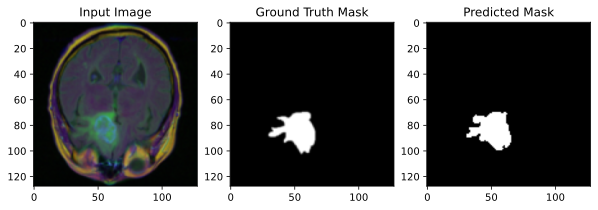

Epoch 27/30, Training Loss: 0.1637
Epoch 27/30, Validation Loss: 0.0108


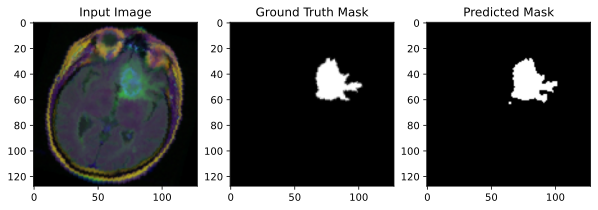

Epoch 28/30, Training Loss: 0.1712
Epoch 28/30, Validation Loss: 0.0107


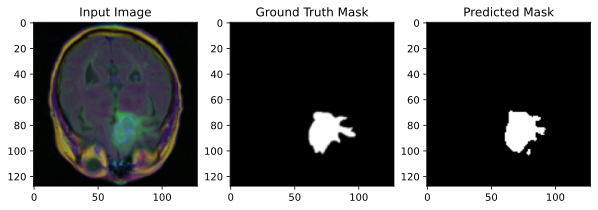

Epoch 29/30, Training Loss: 0.1609
Epoch 29/30, Validation Loss: 0.0097


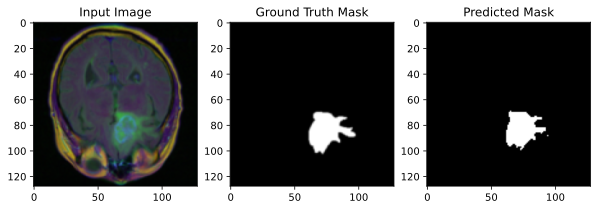

Epoch 30/30, Training Loss: 0.1629
Epoch 30/30, Validation Loss: 0.0120


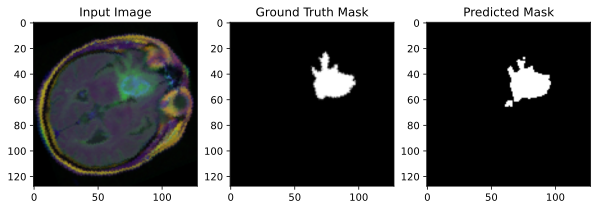

In [146]:
num_epochs = 30

torch.manual_seed(42)
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, masks in train_loader:
        optimizer.zero_grad()

        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)
        # Resize masks to match the size of outputs
        # masks = torch.nn.functional.interpolate(masks, size=outputs.size()[2:], mode='bilinear', align_corners=False).to(device)
        loss = dice_loss(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_loss_history.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}")

    if epoch % 1 == 0:

        model.eval()
        with torch.no_grad():
            testing_loss = 0.0

            for images, masks in test_loader:
                images = images.to(device)
                masks = masks.to(device)
                outputs = model(images)
                preds = torch.sigmoid(outputs)
                preds = preds > 0.5  # Apply threshold

                loss = dice_loss(outputs, masks)
                testing_loss += loss.item() * images.size(0)
                val_loss = testing_loss / len(test_loader.dataset)
                val_loss_history.append(val_loss)

                print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")

                # Visualization code (for example purposes, visualize the first batch)
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 3, 1)
                plt.imshow(transforms.ToPILImage()(images[0].cpu()))
                plt.title("Input Image")

                plt.subplot(1, 3, 2)
                plt.imshow(transforms.ToPILImage()(masks[0].cpu()), cmap="gray")
                plt.title("Ground Truth Mask")

                plt.subplot(1, 3, 3)
                plt.imshow(preds[0].cpu().numpy().squeeze(), cmap="gray")
                plt.title("Predicted Mask")

                plt.show()
                break

torch.save(model.state_dict(), "unet.pth")

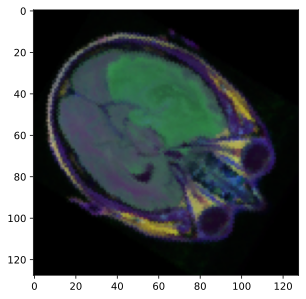

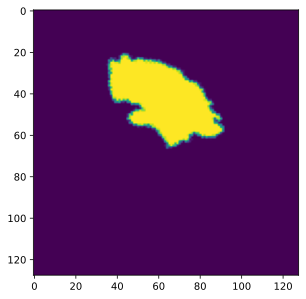

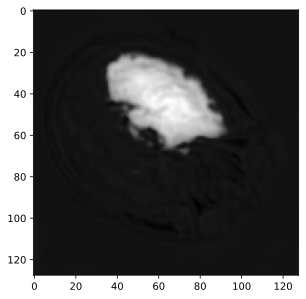

In [147]:
image, mask = next(iter(test_loader))

image = image.to(device)
mask = mask.to(device) 

plt.imshow(image[8].permute(1, 2, 0).detach().cpu().numpy().squeeze())
plt.show()

plt.imshow(mask[8].permute(1, 2, 0).detach().cpu().numpy().squeeze())
plt.show()

image_t = model(image)
plt.imshow(image_t[8].detach().cpu().numpy().squeeze(), cmap="gray")

---

<a id='sec_evaluation'></a>

## Evaluation

$\Rightarrow$ Describe the evaluation of your results


### Goals:
* Choose an evaluation method that can compare two binary segmentation masks and computes a numeric score that describes how well these masks match (use for example the Dice score)
* Hint: specify a function `evaluate(mask1, mask2)` that computes the evaluation score(s)
* Compute mean and standard deviation of the scores of the entire dataset

In [148]:
def plot_side_by_side(image, mask, title1="Image", title2="Mask"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title(title2)
    plt.axis("off")
    plt.show()

In [151]:
def plot_losses(train_loss, val_loss):
    plt.figure(figsize=(8, 5))
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

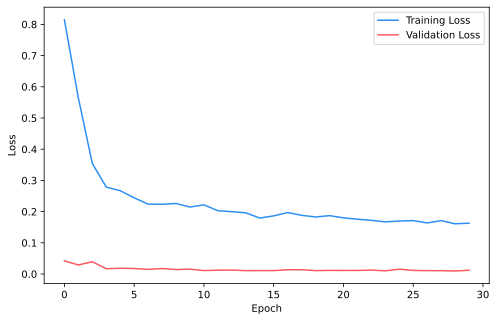

In [152]:
plot_losses(train_loss_history, val_loss_history)

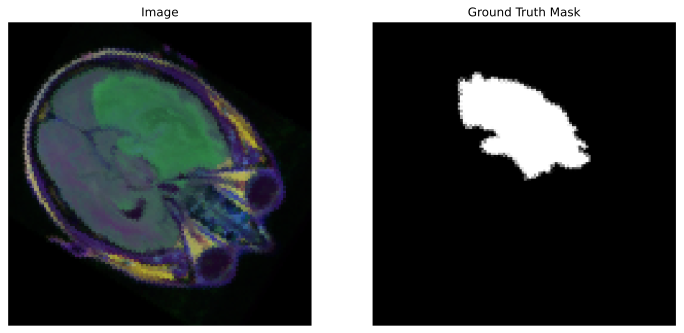

In [153]:
plot_side_by_side(
    image[8].permute(1, 2, 0).detach().cpu().numpy().squeeze(),
    mask[8].permute(1, 2, 0).detach().cpu().numpy().squeeze(),
    title1="Image",
    title2="Ground Truth Mask",
)

In [154]:
import numpy as np


def evaluate_segmentation(pred, target, n_classes=2):
    """
    Compute Intersection over Union score (IoU).

    Parameters:
    pred (numpy.ndarray): Predicted segmentation mask.
    target (numpy.ndarray): Ground truth segmentation mask.
    n_classes (int): Number of classes in the segmentation.

    Returns:
    float: IoU score.
    """
    iou_list = []
    pred = pred.view(-1)
    target = target.view(-1)

    for sem_class in range(n_classes):
        pred_inds = pred == sem_class
        target_inds = target == sem_class
        intersection = (pred_inds[target_inds]).long().sum().data.cpu().item()
        union = (
            pred_inds.long().sum().data.cpu().item()
            + target_inds.long().sum().data.cpu().item()
            - intersection
        )
        if union == 0:
            iou_list.append(
                float("nan")
            )  # If there is no ground truth, do not include in evaluation
        else:
            iou_list.append(float(intersection) / float(max(union, 1)))
    return np.nanmean(iou_list)  # Return average IoU score of all classes

In [156]:
import matplotlib.pyplot as plt


def overlay_segmentation(image, pred, target):
    """
    Overlay segmentation masks on the original image.

    Parameters:
    image (numpy.ndarray): Original image.
    pred (numpy.ndarray): Predicted segmentation mask.
    target (numpy.ndarray): Ground truth segmentation mask.

    Returns:
    None
    """
    # Create a color map for visualizing the masks
    colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]
    cmap = plt.cm.colors.ListedColormap(colors)

    # Normalize the masks to [0, 1] for visualization
    pred = pred / np.max(pred)
    target = target / np.max(target)

    # Create the overlay by adding the masks to the image
    overlay = image.copy()
    overlay[pred > 0] += pred[pred > 0]
    overlay[target > 0] += target[target > 0]

    # Display the overlay
    plt.imshow(overlay, cmap=cmap)
    plt.show()

In [ ]:
image, mask = next(iter(test_loader))

image = image.to(device)
mask = mask.to(device)

plt.imshow(image[8].permute(1, 2, 0).detach().cpu().numpy().squeeze())
plt.show()
plt.axis("off")

plt.imshow(mask[8].permute(1, 2, 0).detach().cpu().numpy().squeeze(), cmap="gray")
plt.show()
plt.axis("off")

image_t = model(image)
plt.imshow(image_t[8].detach().cpu().numpy().squeeze(), cmap="gray")
plt.axis("off")

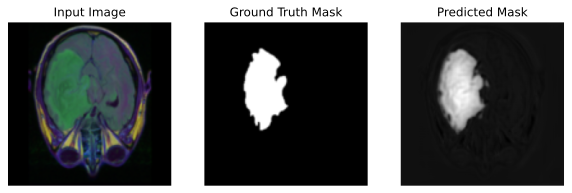

In [198]:
# Visualization code (for example purposes, visualize the first batch)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(transforms.ToPILImage()(image[8].cpu()))
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(transforms.ToPILImage()(mask[8].cpu()), cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image_t[8].detach().cpu().numpy().squeeze(), cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

plt.show()

In [202]:
image_t[8].detach().cpu().numpy().squeeze().shape

(128, 128)

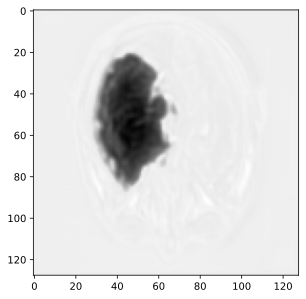

In [205]:
plt.imshow(image_t[8].detach().cpu().numpy().squeeze(), cmap="binary")

In [204]:
mask[8].shape

torch.Size([1, 128, 128])

In [173]:
overlay_segmentation(
    image[8].permute(1, 2, 0).detach().cpu().numpy().squeeze(),
    image_t[8].detach().cpu().numpy().squeeze(),
    mask[8].permute(1, 2, 0).detach().cpu().numpy().squeeze(),
)

ValueError: operands could not be broadcast together with shapes (1705,3) (1705,) (1705,3) 

In [192]:
index = 8
image = Image.open(df_mask.iloc[index]["image_path"])

mask_estimate = model(image.detach().cpu().numpy().squeeze())

AttributeError: 'TiffImageFile' object has no attribute 'detach'

TypeError: Compose.forward() got an unexpected keyword argument 'image'

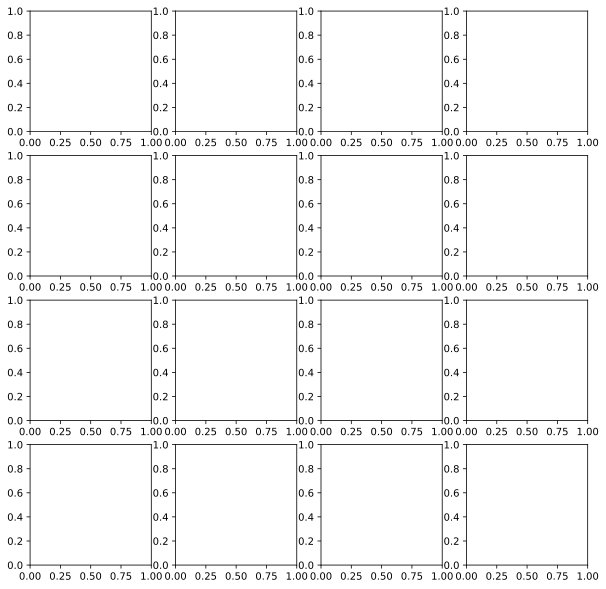

In [188]:
# Generate 16 random indices
indices = np.random.randint(0, len(df_mask), 16)

# Create a figure for the subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Loop over the indices
for i, index in enumerate(indices):
    # Read the image and mask
    
    image = Image.open(df_mask.iloc[index]["image_path"])
    mask = Image.open(df_mask.iloc[index]["mask_path"])
    

    # Create a subplot for the image and mask
    ax = axs[i // 4, i % 4]
    ax.imshow(image, cmap="gray")
    ax.imshow(mask, cmap="jet", alpha=0.5)  # Overlay the mask on the image
    ax.imshow(mask_estimate[0].detach().cpu().numpy().squeeze(), cmap="jet", alpha=0.5)  # Overlay the mask on the image
    ax.axis("off")

    mask_status = "Mask" if df.loc[index, "check_mask"] == 1 else "No mask"
    ax.set_title(f"Index: {index}\n{mask_status}")


plt.tight_layout()
plt.show()

In [180]:
indices

array([1123,  871,  130, 1332,  769,  343,  805,  385, 1215,  955,  276,
       1184,  459, 1337,   21,  252])

In [164]:
image[8].shape

torch.Size([3, 128, 128])

In [166]:
mask[8].shape

torch.Size([1, 128, 128])

In [168]:
image_t[8].shape

torch.Size([1, 128, 128])

---

<a id='sec_discussion'></a>

## Discussion

$\Rightarrow$ Discuss your results and experiences briefly.




---

<a id='sec_references'></a>

## References

$\Rightarrow$ Add here references as URLs.

Also declare the usage of **generative AI** here!!




<br><br><br><br><br><br><br><br>

---

<a id='sec_hints'></a>

## Hints:
* Display your data if possible.
* An easy way to show 2D images is using Pillow:


In [ ]:
# Displayin an image with Pillow
path = "../data/images/kidney-cells.jpg"
path = "../data/images/histology-image.jpg"
image = PIL.Image.open(path)
display(image)                  

In [ ]:
# If you keep the data as a numpy array (for example when using
# the OpenCV interface), you can use matplotlib to display it.
path = "../data/images/ct-brain-slices.jpg"
image = cv.imread(path)
plt.imshow(image)
plt.axis("off");


In [ ]:
# For convenience, we also provide tools.display_image()
path = "../data/images/kidney-cells.jpg"
tools.display_image(path, scale=0.5)

There are many ways how to overlay an image with the mask. Here is one option:

In [ ]:
# Enforce a (3-channel) color image
path_image = "../data/images/neurons-cultured.jpg"
image = cv.imread(path_image, cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Mask image
path_mask = "../data/images/neurons-cultured-mask.png"
mask = cv.imread(path_mask, cv.IMREAD_GRAYSCALE)

# Create overlay (RGB)
overlay_color = [255, 0, 0]
overlay_alpha = 0.3
overlay = image.copy()
overlay[mask > 0] = overlay_color
overlay = cv.addWeighted(image, 1 - overlay_alpha, overlay, overlay_alpha, 0)

# Display the images next to each other using a convenience function
tools.show_image_chain((image, overlay), titles=("Input", "Overlay"))


In [ ]:
# We could also create contours around the mask and display them
overlay_color = [255, 255, 0]
line_width = 1
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
image_contours = image.copy()
cv.drawContours(image_contours, contours, -1, overlay_color, line_width)
tools.show_image_chain((image, image_contours), titles=("Input", "Contours"))

An advanced example: We can colorize the different contours with different colors.

Strategy:
- Use connected components to label the different regions using integers 
(every region has a different label)
- Assign a different color to different labels by encoding the label in 
the hue channel (HSV color space!)
- Extract contours from the mask (must be a binary image)
- Merge draw the contours with the colorized labels onto the original image

In [ ]:
# This will contain the result
image_contours = image.copy()

# Compute the "connected components" (= separate objects in the mask)
n_labels, labels = cv.connectedComponents(mask)

# Assign a different color to each label in the hue channel (HSV color space)
hue = np.uint8(150*labels/np.max(labels))
blank = 255*np.ones_like(hue)
labels = cv.merge([hue, blank, blank])

# Convert from HSV color space to RGB
labels = cv.cvtColor(labels, cv.COLOR_HSV2RGB)
# Set the background label (labels==0) to black
labels[labels==0] = 0

# Create a mask of the contours
line_width = 1
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
mask_contours = cv.drawContours(np.zeros_like(mask), contours, -1, 255, line_width)

# Assign the colored labels only along the contours
image_contours[mask_contours>0] = labels[mask_contours>0]

# Display the result
tools.show_image_chain((image, image_contours), titles=("Input", "Labeled contours"))

### How to convert a Jupyter notebook into a PDF:

- Don't forget to save this notebook before converting!
- Install nbconvert: `pip install nbconvert`
- Convert the notebook into a HTML file: `jupyter nbconvert --to html main.ipynb`  
  The file will be saved in the same folder as this Jupyter notebook
- Open the HTML in a browser and print (or save) it as a PDF
- Recommendation: If you use the Opera browser, you can save the HTML as single-page PDF. This looks the best!

In [ ]:
# Make sure you save this notebook, otherwise the HTML 
# output will not contain the latest version!!

# Make sure you have nbcovnert installed
!pip install nbconvert --quiet
# Save the notebook as HTML
!jupyter nbconvert --to html main.ipynb
